<a href="https://colab.research.google.com/github/zahrra55/Linear-Regression/blob/main/LSML_LR_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Gradient Descent with α=0.01 for 2000 iterations...


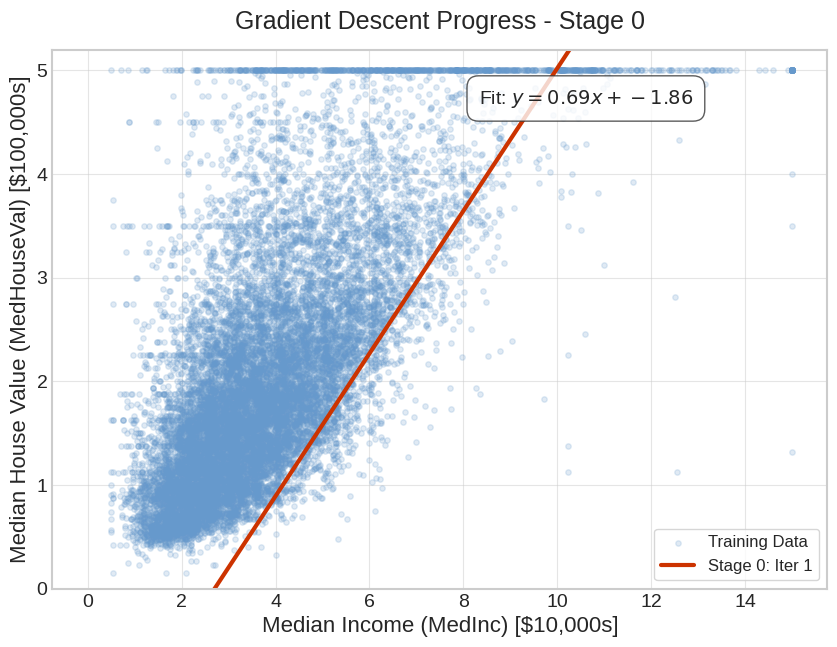

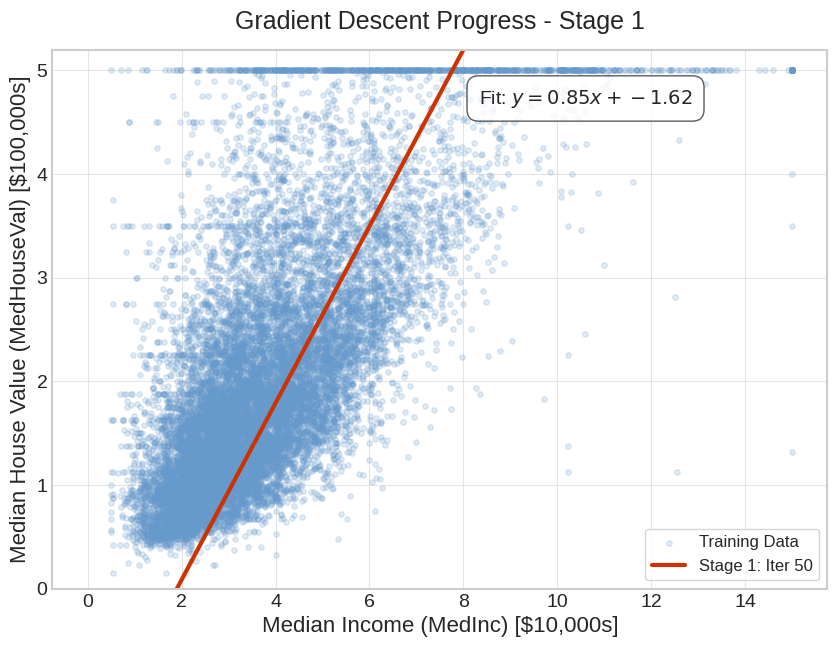

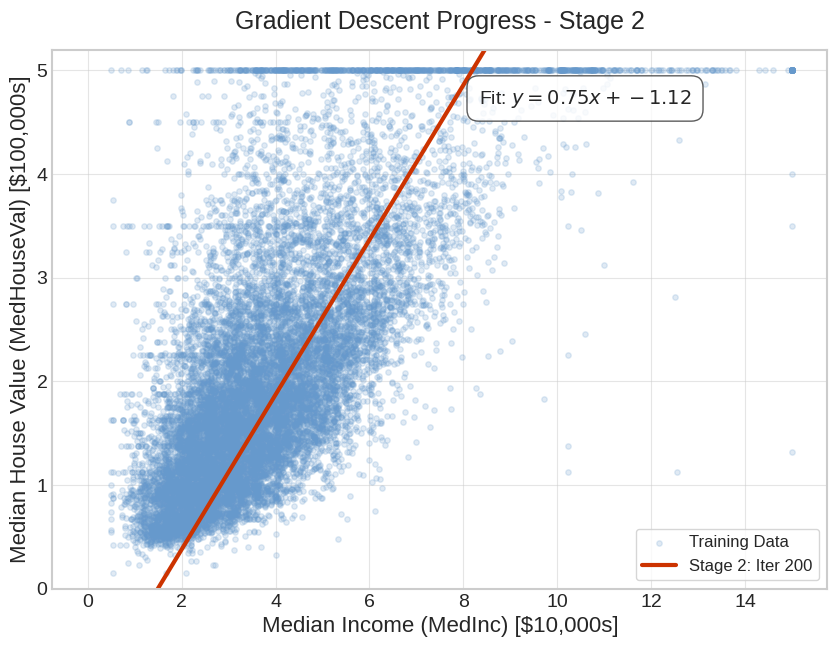

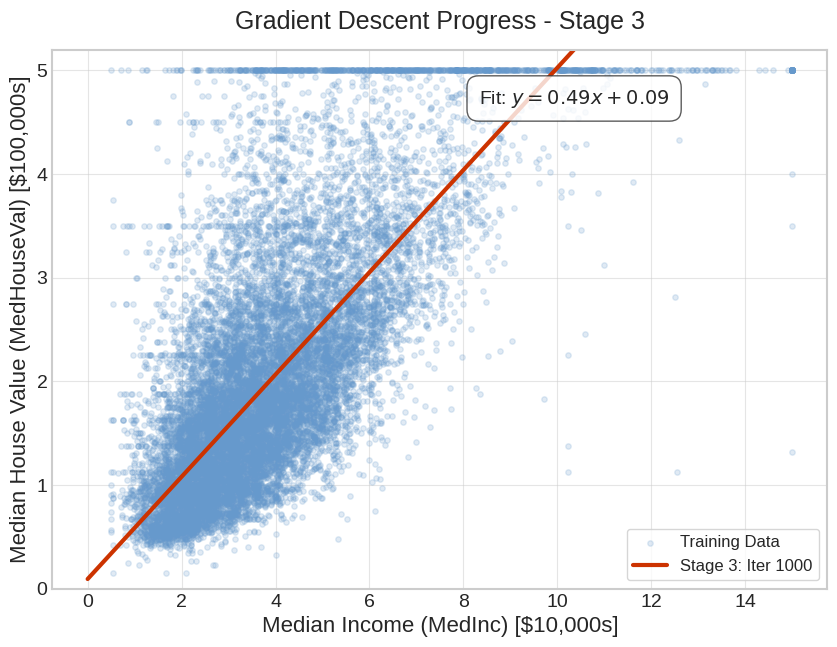

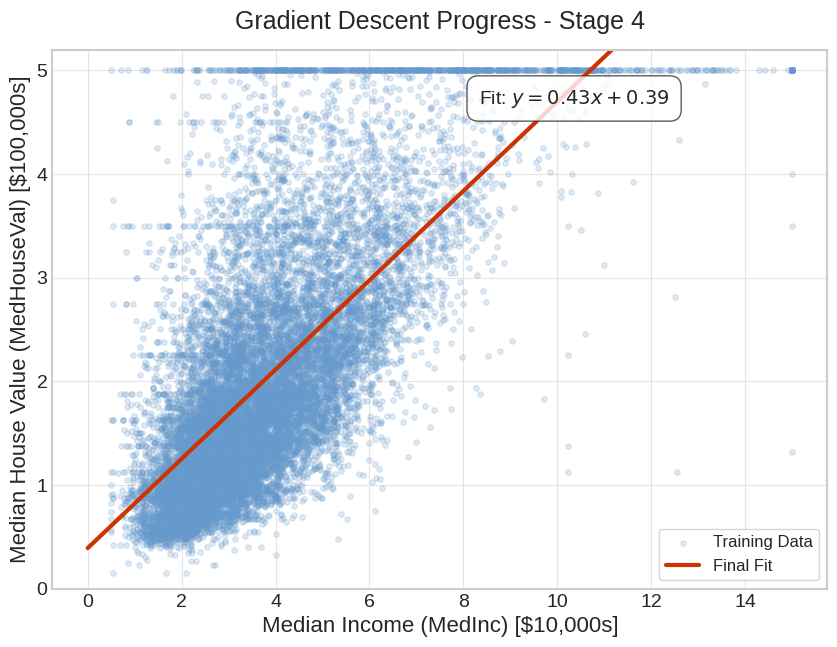

--- Final Model Parameters ---
Intercept (θ0): 0.3898
Slope (θ1): 0.4308


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import matplotlib as mpl

# ----------------------------------------------------
# 1. SETUP AND VISUALIZATION PARAMETERS
# ----------------------------------------------------

# Simple plot style setup — keeping it clean and readable
plt.style.use('seaborn-v0_8-whitegrid')

# Tweak a few matplotlib settings to make plots look decent
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['grid.alpha'] = 0.5

# Just to make results consistent every run
np.random.seed(42)

# ----------------------------------------------------
# 2. DATA ACQUISITION AND PREPARATION
# ----------------------------------------------------

# Load the California housing dataset
housing_data = fetch_california_housing(as_frame=True)
X_feature = housing_data.frame[['MedInc']].values
y_target = housing_data.target.values.reshape(-1, 1)

# Add a bias column (for the intercept term)
X_b = np.c_[np.ones((X_feature.shape[0], 1)), X_feature]

# Shuffle and split the data (basic manual split)
shuffled_indices = np.random.permutation(len(X_b))
test_ratio = 0.2
test_size = int(len(X_b) * test_ratio)
train_indices = shuffled_indices[test_size:]

X_train = X_b[train_indices]
y_train = y_target[train_indices]

# Extract the values we'll plot later
X_plot = X_train[:, 1]
y_plot = y_train.flatten()

# ================================================================
# 3. GRADIENT DESCENT + VISUALIZING HOW IT LEARNS STEP BY STEP
# ================================================================

# Hyperparameters
learning_rate = 0.01
n_iterations = 2000   # enough iterations for it to converge
m = len(X_train)

# We'll plot a few stages to see how the line moves toward the best fit
plot_steps = [1, 50, 200, 1000, n_iterations]
theta = np.random.randn(2, 1)  # random starting point

# A fixed x-range for plotting the line
X_line = np.array([[0], [15]])
X_line_b = np.c_[np.ones((2, 1)), X_line]

print(f"Starting Gradient Descent with α={learning_rate} for {n_iterations} iterations...")

# Main gradient descent loop
for iteration in range(1, n_iterations + 1):

    # Compute the gradients (vectorized)
    gradients = (1/m) * X_train.T @ (X_train @ theta - y_train)
    theta = theta - learning_rate * gradients

    # Plot only at specific checkpoints
    if iteration in plot_steps:
        current_bias = theta[0, 0]
        current_slope = theta[1, 0]

        # Predict using the current parameters
        y_line_pred_current = X_line_b @ theta

        plt.figure(figsize=(10, 7))

        # Training data
        plt.scatter(
            X_plot, y_plot,
            color='#6699CC',
            label='Training Data',
            alpha=0.2, s=15
        )

        # Current regression line
        stage_label = 'Final Fit' if iteration == n_iterations else f'Stage {plot_steps.index(iteration)}: Iter {iteration}'
        plt.plot(
            X_line, y_line_pred_current,
            color='#CC3300',
            linewidth=3,
            label=stage_label
        )

        # Basic plot styling
        plt.title(f'Gradient Descent Progress - Stage {plot_steps.index(iteration)}', pad=15)
        plt.xlabel('Median Income (MedInc) [$10,000s]')
        plt.ylabel('Median House Value (MedHouseVal) [$100,000s]')

        # Show the current equation on the plot
        ax = plt.gca()
        ax.annotate(
            f'Fit: $y = {current_slope:.2f}x + {current_bias:.2f}$',
            xy=(0.55, 0.9),
            xycoords='axes fraction',
            fontsize=14,
            bbox=dict(boxstyle="round,pad=0.6", fc="white", alpha=0.8, ec="#333333")
        )

        plt.legend(loc='lower right', frameon=True, fontsize=12)
        plt.ylim(0, 5.2)
        plt.show()

# ----------------------------------------------------
# 4. FINAL RESULTS
# ----------------------------------------------------
print("--- Final Model Parameters ---")
print(f"Intercept (θ0): {current_bias:.4f}")
print(f"Slope (θ1): {current_slope:.4f}")
